In [47]:
input_file = open('sentences.txt', 'r')
sentences = list(map(lambda x: x.lower(), input_file))
input_file.close()

import re
import numpy as np
from scipy.spatial import distance
from collections import defaultdict

def tokenize(sentence):
    tokens = re.split('[^a-z]', sentence)
    return list(filter(None, tokens))
    
words = {}
free_id = 0
for sentence in sentences:
    tokens = tokenize(sentence)
    for token in tokens:
        if (token not in words):
            words[token] = free_id
            free_id += 1
 
svec = np.zeros((len(sentences), len(words)))
for i in range(len(svec)):
    sen = sentences[i]
    tokens = tokenize(sen)
    for token in tokens:
        svec[i][words[token]] += 1

dists = []
for i in range(1, len(svec)):
    dist = scipy.spatial.distance.cosine(svec[0], svec[i])
    dists.append((dist, i))
    
dists = sorted(dists)
output = open('submission-1.txt', 'w')
output.write(' '.join([str(dists[0][1]), str(dists[1][1])]))
output.close()

In [48]:
!cat submission-1.txt

6 4

In [51]:
import math

def f(x):
    return math.sin(float(x) / 5) * math.exp(float(x) / 10) + 5 * math.exp(-float(x) / 2)

In [72]:
from scipy import linalg

def solve(points):
    A = []
    for point in points:
        A.append([point ** i for i in range(len(points))])

    b = [f(x) for x in points]
    return linalg.solve(A, b)

In [73]:
def approx(x, points):
    sol = solve(points)
    res = 0.
    for i in range(len(sol)):
        res += sol[i] * x ** i
    return res

In [80]:
import matplotlib.pyplot as plt

def draw_plot(points):
    x = np.arange(1., 15., 0.2)
    plt.plot(x, list(map(f, x)))
    plt.plot(x, list(map(lambda x: approx(x, points), x)))

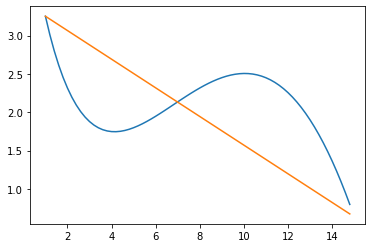

In [81]:
draw_plot([1, 15])

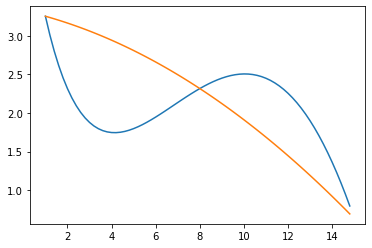

In [82]:
draw_plot([1, 8, 15])

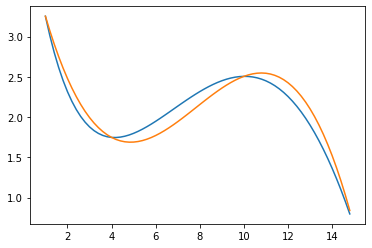

In [83]:
draw_plot([1, 4, 10, 15])

In [90]:
solution = solve([1, 4, 10, 15])
with open('submission-2.txt', 'w') as output_file:
    output_file.write(' '.join(map(str, solution)))

In [91]:
!cat submission-2.txt

4.362641535118072 -1.2955258656948436 0.1933368470215116 -0.008235651173320552